In [3]:
# Imports
from utils import *
import numpy as np
import scipy as sp
from sklearn.linear_model import LinearRegression


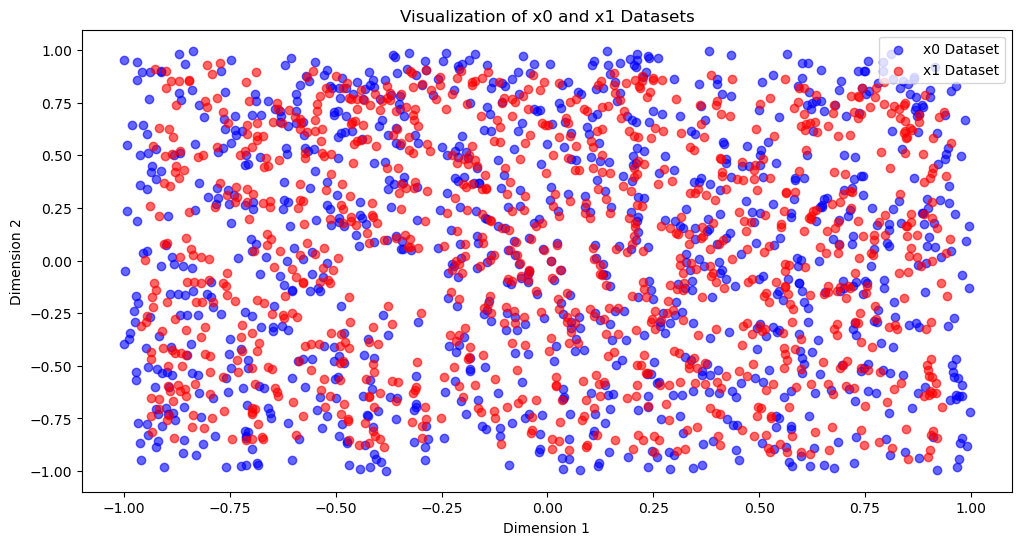

In [4]:
# load the data 
x0 = load_dataset("datasets/linear_vectorfield_data_x0.txt", sort=True)
x1 = load_dataset("datasets/linear_vectorfield_data_x1.txt", sort=True)

plt.figure(figsize=(12, 6))

# plot the dataset 
plt.scatter(x0[:, 0], x0[:, 1], alpha=0.6, label='x0 Dataset', color='blue')
plt.scatter(x1[:, 0], x1[:, 1], alpha=0.6, label='x1 Dataset', color='red')
plt.legend()

plt.title('Visualization of x0 and x1 Datasets')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

Part one fine the extimated matrix A 

In [5]:
delta_t = 0.1 # the time step is fixed as 0.1
# here we want to calculate the Matrix A 2x2 dims. 
# vk = A * x0. use least-square error
vk = estimate_vector( x0, x1, delta_t)
est_A,_,_,_ = np.linalg.lstsq(x0, vk, rcond=None)

Part two 

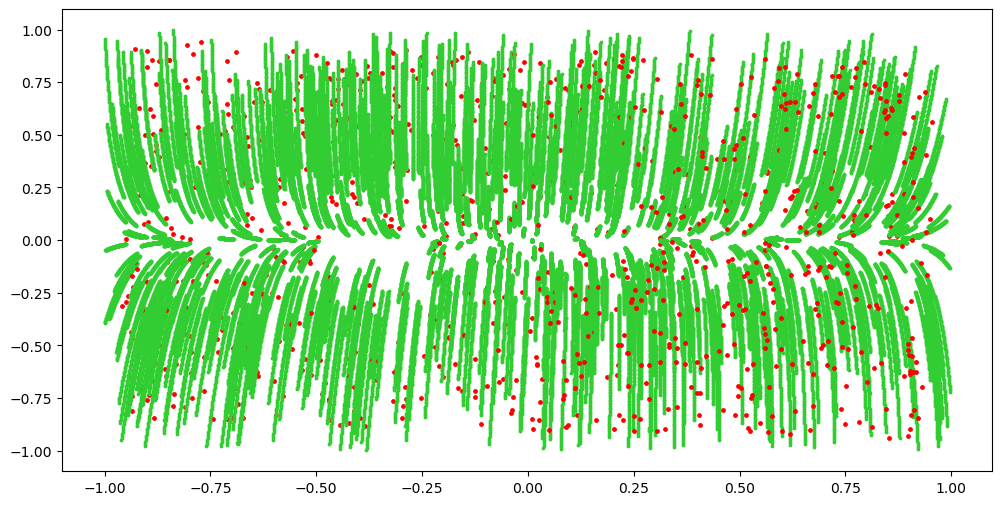

Residual error: [2.26800447e+00 2.83210804e+04]
MSE value is: 0.32910430761537535


In [6]:
# utilize delta_t for minimum mse, plot results
plt.rcParams["figure.figsize"] = (12,6)
v = estimate_vector( x0, x1,delta_t)
A, res, _, _ = np.linalg.lstsq(x0, v, rcond=None)
# print(v)
# print(x0)
x1_pred = trajectory(x0, x1, linear_system, end_time=0.1, args=[A], plot=True)
print("Residual error:",res)
print("MSE value is:", np.linalg.norm(x1_pred-x1)**2 / x1.shape[0])

Part three

Eigenvalues of A:  [-0.49141166 -9.92143683]


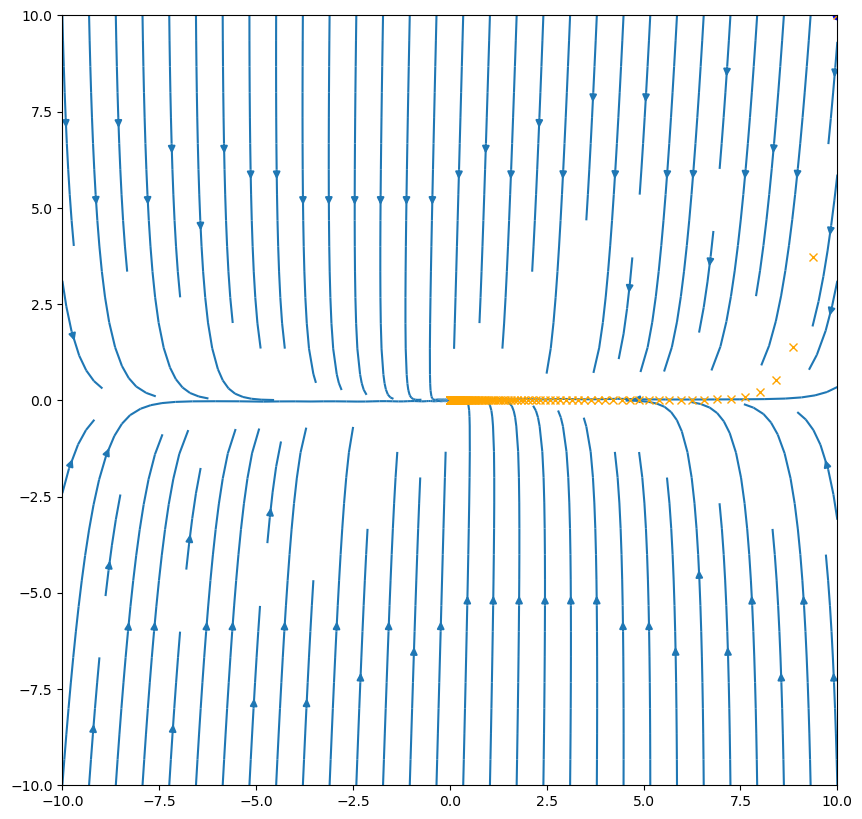

In [8]:
create_phase_portrait_matrix(A, title_suffix="unstable focus", display=False)
sol = solve_ivp(linear_system, [0, 100], [10, 10], t_eval=np.linspace(0, 100, 1000), args=[A])
plt.scatter(10, 10, c='blue')
plt.plot(sol.y[0,:],sol.y[1,:], 'x', c='orange')
plt.rcParams["figure.figsize"] = (14,14)
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.show()